<p align="center">
  <img src="https://raw.githubusercontent.com/pachecowillians/svg-icons/24b0ca90f467a751be9f0e7e5fa50801f89e4d17/img/diabetes.svg" alt="Diabetes" width="100px">
</p>

Predictive analysis of individuals' health, specifically focusing on determining the presence or absence of diabetes. The notebook utilizes machine learning techniques and a dataset containing relevant health indicators such as gender, BMI, hypertension, and age. By training a classification model and evaluating its performance, valuable insights can be gained regarding the predictive factors associated with diabetes.

In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
# Loading the Wine Dataset
ds = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

# Displaying the dataset
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
def generateIdToColumn(column):
    # Get the distinct values from the column
    unique_values = column.unique()

    # Create a mapping dictionary for the distinct values
    mapping_gender = {valor: index for index, valor in enumerate(unique_values)}

    # Replace the values in the column with the corresponding number
    column = column.map(mapping_gender)

    return column

In [4]:
# Converting the 'gender' column to numerical values using the 'generateIdToColumn' function
ds['gender'] = generateIdToColumn(ds['gender'])

# Displaying the first few rows of the DataFrame after the conversion
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Converting the 'smoking_history' column to numerical values using the 'generateIdToColumn' function
ds['smoking_history'] = generateIdToColumn(ds['smoking_history'])

# Displaying the first few rows of the DataFrame after the conversion
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [6]:
# Splitting the dataset into goal (target variable) and predict (feature variables)
goal = ds['diabetes']
predict = ds.drop('diabetes', axis=1)

In [7]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

In [8]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(predict, goal, test_size=0.3)

In [9]:
# Printing the shapes of the datasets
print(ds.shape, x_train.shape, x_test.shape)

(100000, 9) (70000, 8) (30000, 8)


In [10]:
import warnings

warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense

2023-06-24 17:14:32.694744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 17:14:33.385773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 17:14:33.389959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 17:14:35.623009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
# Creating an instance of the ExtraTreesClassifier model
model = Sequential()
model.add(Dense(units=3, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [38]:
# Calculating the accuracy of the trained model on the test set
result = model.fit(x_train, y_train, epochs=200, batch_size=320, validation_data=(x_test, y_test))

Epoch 1/200
  7/219 [..............................] - ETA: 1s - loss: 0.0347 - mae: 0.0799

219/219 [==============================] - 1s 6ms/step - loss: 0.0332 - mae: 0.0811 - val_loss: 0.0333 - val_mae: 0.0815
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 0.0332 - mae: 0.0808 - val_loss: 0.0334 - val_mae: 0.0842
Epoch 3/200
219/219 [==============================] - 1s 5ms/step - loss: 0.0333 - mae: 0.0804 - val_loss: 0.0332 - val_mae: 0.0809
Epoch 4/200
219/219 [==============================] - 1s 4ms/step - loss: 0.0333 - mae: 0.0803 - val_loss: 0.0332 - val_mae: 0.0823
Epoch 5/200
219/219 [==============================] - 1s 3ms/step - loss: 0.0332 - mae: 0.0801 - val_loss: 0.0333 - val_mae: 0.0778
Epoch 6/200
219/219 [==============================] - 1s 4ms/step - loss: 0.0332 - mae: 0.0798 - val_loss: 0.0332 - val_mae: 0.0784
Epoch 7/200
219/219 [==============================] - 1s 3ms/step - loss: 0.0333 - mae: 0.0797 - val_loss: 0.0331 - val_mae: 0.0799
Epoch 8/200
219/219 [==============================] - 1s 3ms/step - loss: 0.0332

In [39]:
import matplotlib.pyplot as plt

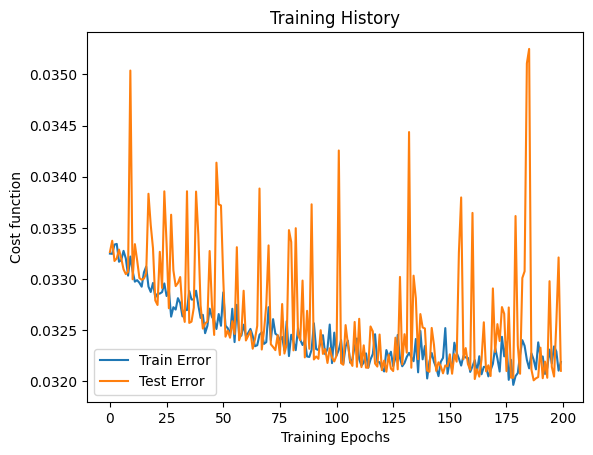

In [40]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Training History')
plt.ylabel('Cost function')
plt.xlabel('Training Epochs')
plt.legend(['Train Error', 'Test Error'])
plt.show()

In [41]:
# Importing the random module
import random

In [42]:
# Randomly sampling 10 rows from the DataFrame 'x_test'
random_sample = x_test.sample(n=10)

In [43]:
# Obtaining the corresponding 'y' values for the randomly sampled rows
random_sample_goal = y_test.loc[random_sample.index]

In [44]:
# Importing the NumPy library with the alias 'np'
import numpy as np

In [45]:
# Converting 'random_sample_goal' to a NumPy array
random_sample_goal = np.array(random_sample_goal)
print(random_sample_goal)

[1 0 0 1 1 0 0 0 0 0]


In [46]:
# Making predictions on the selected subset of test data
prediction = model.predict(random_sample)

print(prediction)

1/1 [==============================] - 0s 41ms/step
[[0.91690475]
 [0.01311041]
 [0.46834132]
 [0.05443721]
 [0.24858442]
 [0.01212321]
 [0.01547843]
 [0.00798788]
 [0.02318004]
 [0.0024687 ]]


In [57]:
binary_predictions = (prediction > 0.1).astype(int)
print(binary_predictions)

[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [58]:
binary_predictions = binary_predictions.flatten()
print(binary_predictions)

[1 0 1 0 1 0 0 0 0 0]


In [59]:
# Printing the comparison results
print(random_sample_goal == binary_predictions)

[ True  True False False  True  True  True  True  True  True]
